In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def plot_comparison_grid(df, metrics):
    models = df['Model'].unique()
    datasets = df['Dataset'].unique()

    num_metrics = len(metrics)
    num_cols = 2  # Number of columns in the grid
    num_rows = int(np.ceil(num_metrics / num_cols))  # Number of rows needed

    plt.figure(figsize=(15, 8 * num_rows))

    # Define the custom color palette
    colors = ['khaki', 'yellow', 'orange', 'orangered', 'darkred']
    num_colors = len(colors)

    num_models = len(models)
    bar_width = 1 / (num_models + 1)  # Calculate bar width based on number of models
    index = np.arange(len(datasets))

    for i, metric in enumerate(metrics):
        plt.subplot(num_rows, num_cols, i + 1)

        for j, model in enumerate(models):
            model_data = df[df['Model'] == model].set_index('Dataset').reindex(datasets)
            if model_data.empty:
                continue  # Skip if no data for this model

            # Determine color for this model, cycling through the custom colors
            color = colors[j % num_colors]

            bars = plt.bar(index + j * bar_width - (num_models / 2) * bar_width,
                           model_data[metric],
                           bar_width,
                           color=color,
                           label=model)

            # Add value labels on top of bars
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width() / 2, height +0.01,
                         f'{height:.2f}',
                         ha='center', va='bottom',  fontsize=10, rotation=90)

        plt.xlabel('Datasets')
        plt.ylabel(metric)
        plt.title(f'Comparison of {metric} across Datasets')
        plt.xticks(index, datasets, rotation=45)
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()

In [3]:
def plot_comparison_single(df):
    models = df['Model'].values
    metrics = df.columns[1:]  # Exclude the 'Model' column
    num_metrics = len(metrics)
    num_models = len(models)

    plt.figure(figsize=(15, 8))

    # Define the custom color palette
    colors = ['khaki', 'yellow', 'orange', 'orangered', 'darkred']
    num_colors = len(colors)

    bar_width = 0.8 / num_models  # Calculate bar width based on number of models
    index = np.arange(num_metrics)  # X locations for the metrics

    for i, metric in enumerate(metrics):
        # Extract the values for this metric for each model
        values = df[metric].values

        # Position of bars for each model within this metric group
        bar_positions = index[i] + np.arange(num_models) * bar_width - (num_models / 2) * bar_width

        # Plot bars for this metric
        for j, model in enumerate(models):
            plt.bar(bar_positions[j],
                    values[j],
                    bar_width,
                    color=colors[j % num_colors],
                    label=model if i == 0 else "")  # Show legend only for the first metric to avoid duplicates

            # Add the value on top of each bar
            plt.text(bar_positions[j],
                     values[j] + 0.01,  # Adjust this value to position the text correctly
                     f'{values[j]:.2f}',  # Format the number as needed
                     ha='center', va='bottom')

    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title('Comparison of Metrics across Models')
    plt.xticks(index, metrics, rotation=45)
    plt.legend(loc='lower right', title='Models')
    plt.grid(True)


    plt.tight_layout()
    plt.show()

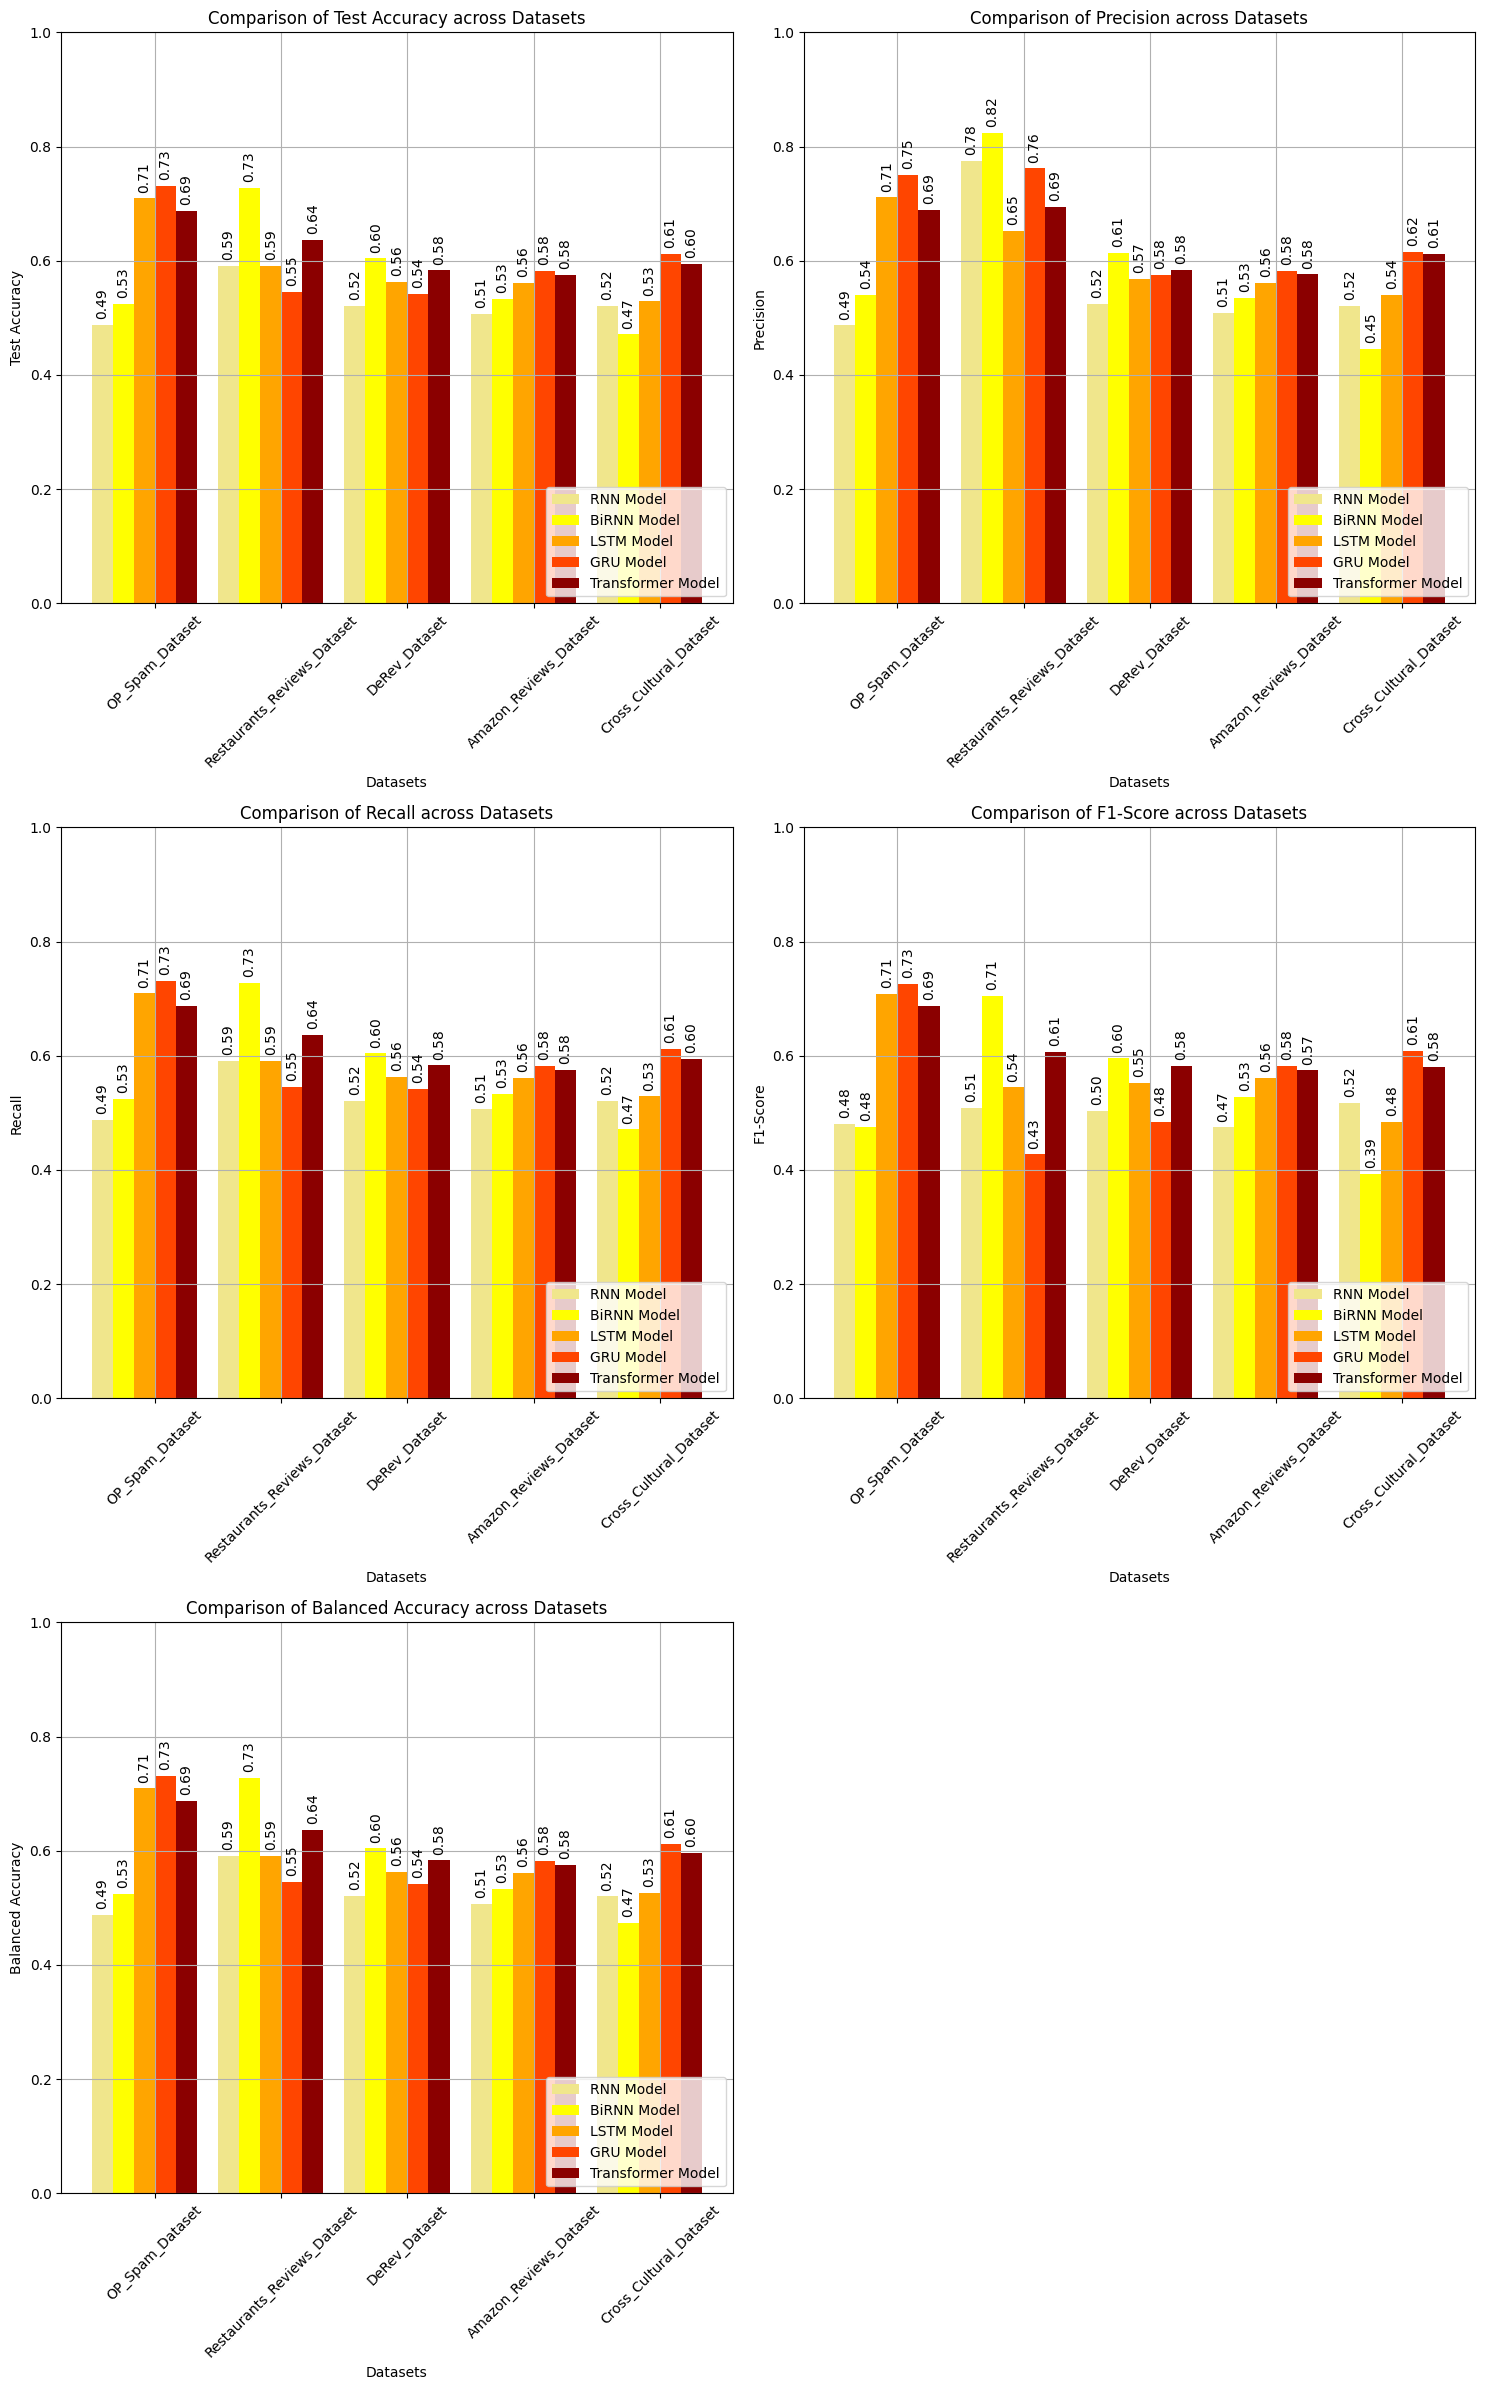

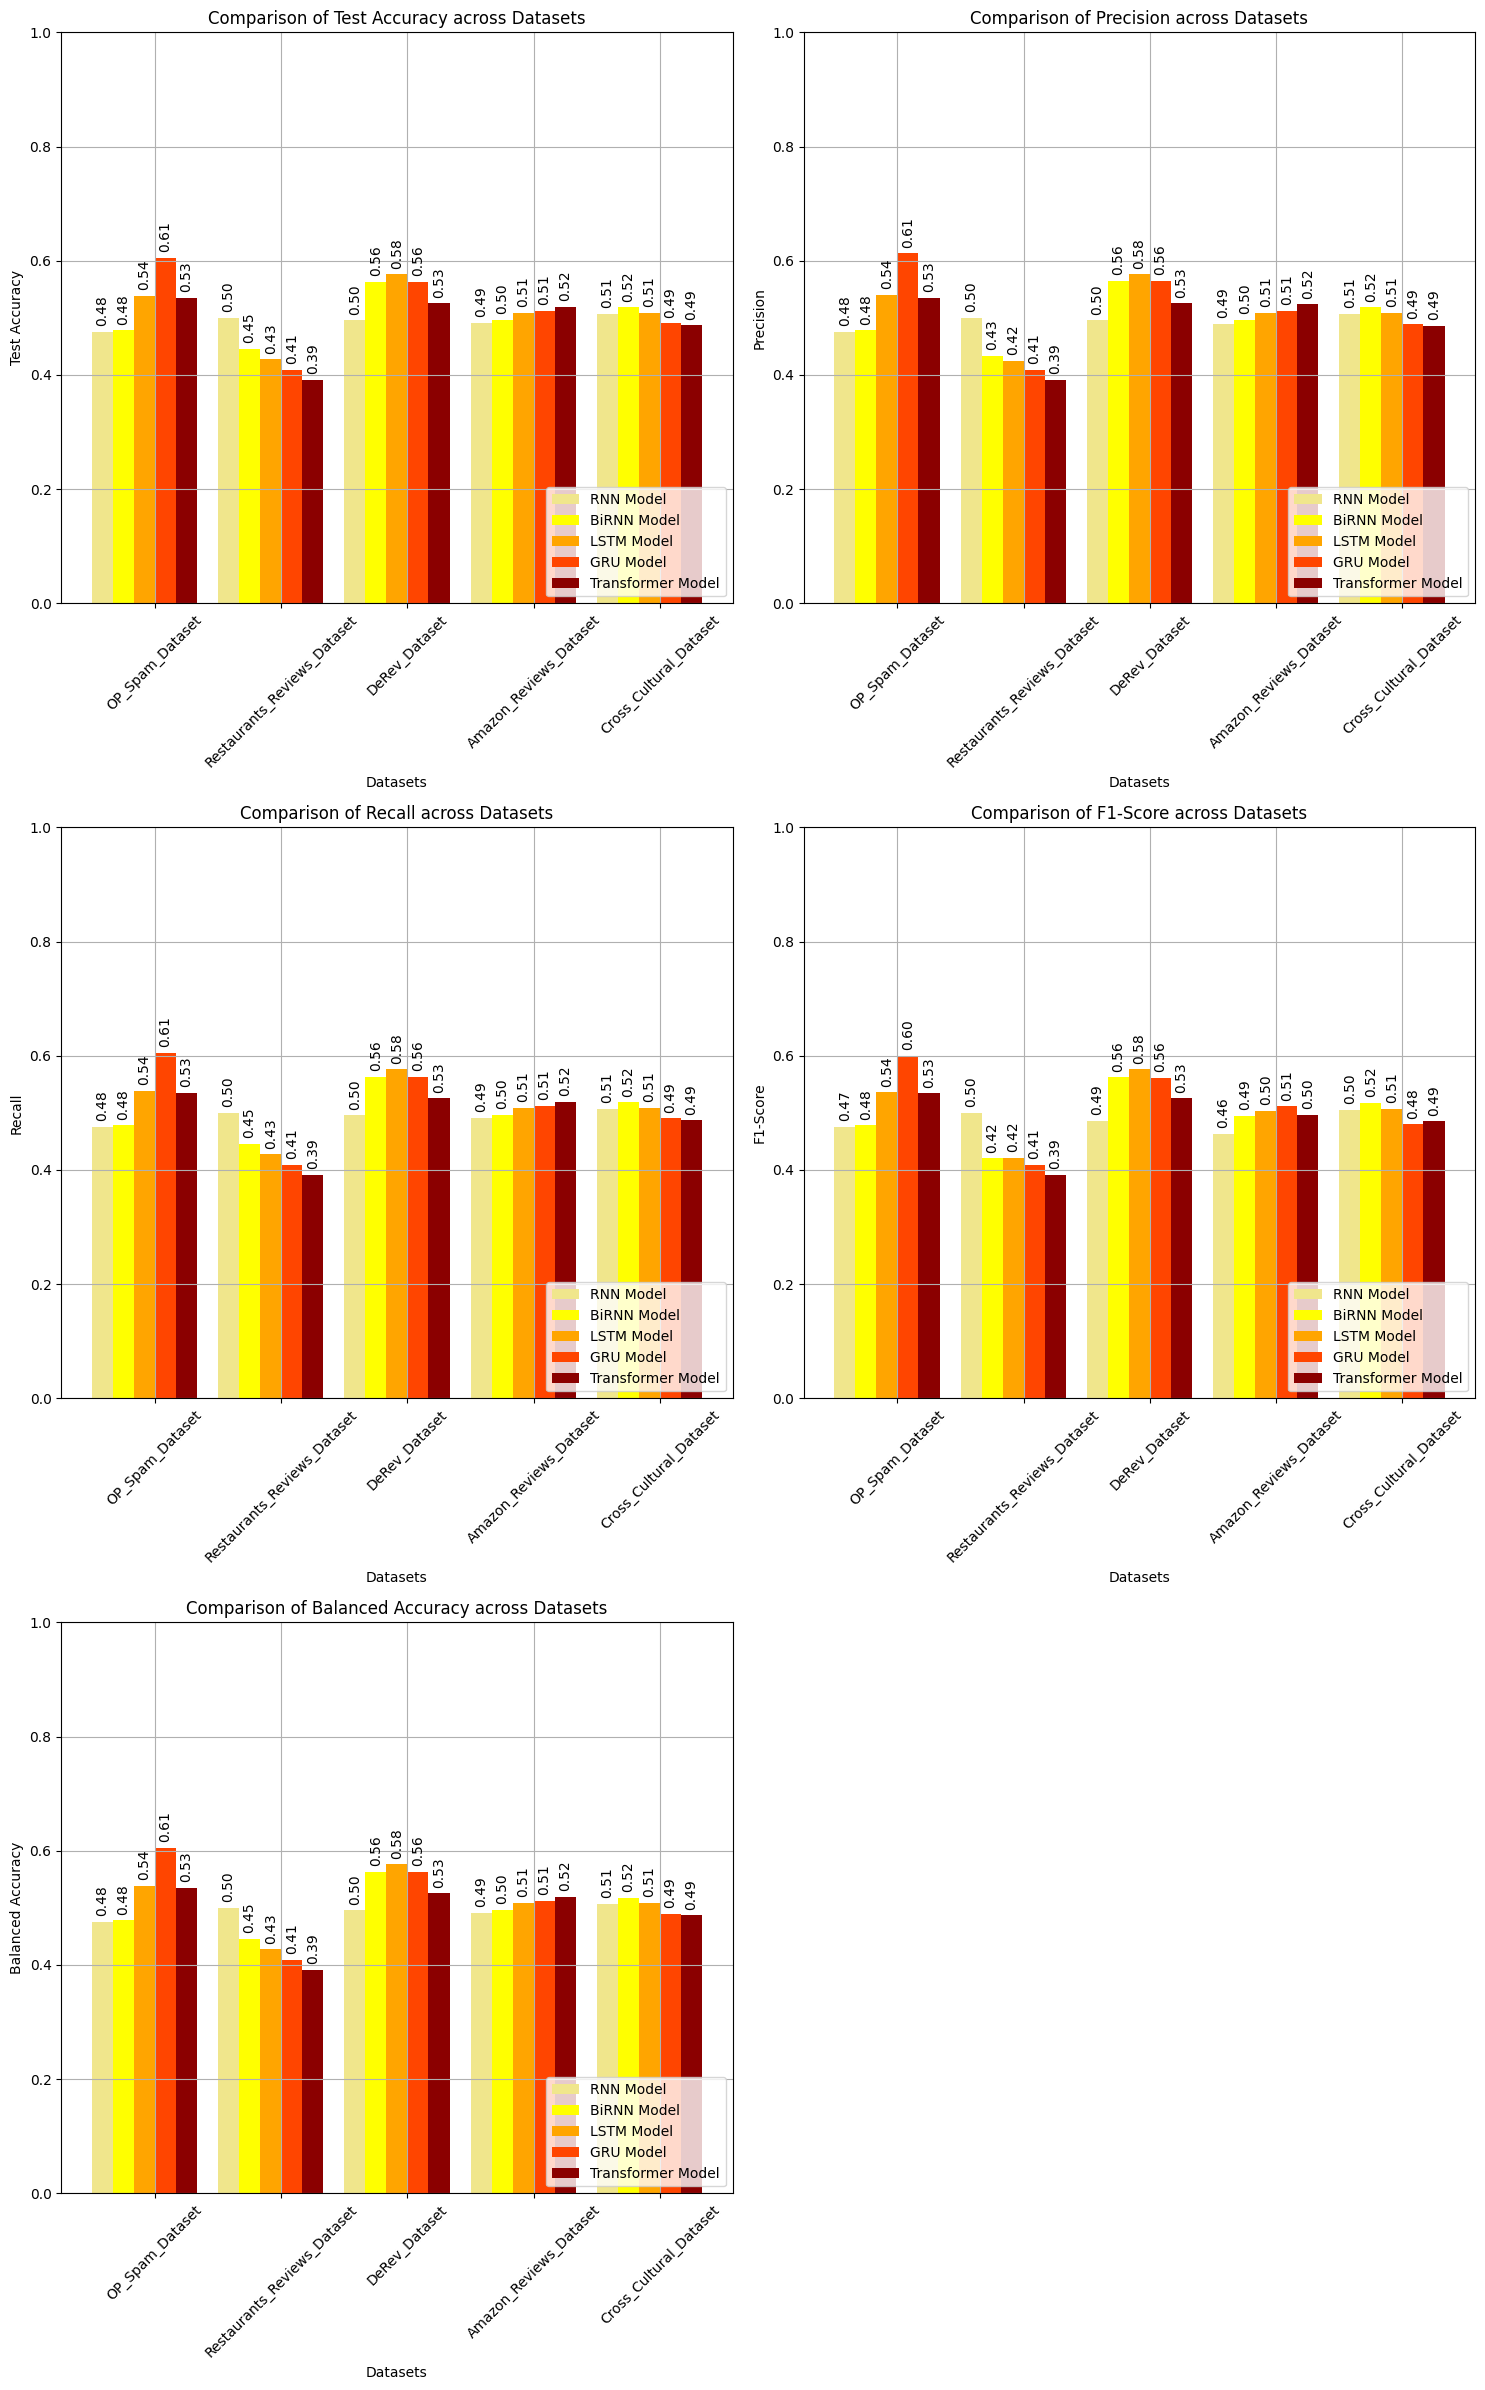

In [4]:
df_in = pd.read_csv('/in_domain_full_results.csv')
df_cross = pd.read_csv('/cross_domain_full_results.csv')

metrics_list = ['Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'Balanced Accuracy']

plot_comparison_grid(df_in, metrics_list)
plot_comparison_grid(df_cross, metrics_list)

In [5]:
# Define the desired order for 'Dataset'
dataset_order = [
    'Amazon_Reviews_Dataset', 'OP_Spam_Dataset', 'DeRev_Dataset',
    'Cross_Cultural_Dataset', 'Restaurants_Reviews_Dataset'
]

# Define the desired order for 'Model'
model_order = [
    'RNN Model', 'BiRNN Model', 'LSTM Model', 'GRU Model', 'Transformer Model'
]

# Convert 'Dataset' and 'Model' columns to categorical type with the specified order
df_in['Dataset'] = pd.Categorical(df_in['Dataset'], categories=dataset_order, ordered=True)
df_in['Model'] = pd.Categorical(df_in['Model'], categories=model_order, ordered=True)

# Sort by 'Dataset' and then by 'Model'
df_sorted = df_in.sort_values(by=['Dataset', 'Model'])

print(df_sorted)

    Unnamed: 0                      Dataset  Parameters  Training Time  \
3            3       Amazon_Reviews_Dataset      678254       1.973258   
8            8       Amazon_Reviews_Dataset      689006       2.096854   
13          13       Amazon_Reviews_Dataset      710126       2.783757   
18          18       Amazon_Reviews_Dataset      699502       3.179116   
23          23       Amazon_Reviews_Dataset      714494       2.875984   
0            0              OP_Spam_Dataset      172954       0.383624   
5            5              OP_Spam_Dataset      183706       0.364498   
10          10              OP_Spam_Dataset      204826       0.361930   
15          15              OP_Spam_Dataset      194202       0.237866   
20          20              OP_Spam_Dataset      209194       0.293255   
2            2                DeRev_Dataset       38754       0.083083   
7            7                DeRev_Dataset       49506       0.054775   
12          12                DeRev_Da

In [6]:
df_sorted.to_csv('sorted_results.csv', index=False)

               Model  Test Accuracy  Precision    Recall  F1-Score  \
0          RNN Model       0.525266   0.563023  0.525266  0.496960   
1        BiRNN Model       0.572122   0.591585  0.572122  0.539546   
2         LSTM Model       0.590628   0.606709  0.590628  0.570516   
3          GRU Model       0.602464   0.657088  0.602464  0.565705   
4  Transformer Model       0.615543   0.631242  0.615543  0.606267   

   Balanced Accuracy  
0           0.525123  
1           0.572716  
2           0.590143  
3           0.602609  
4           0.615852  
               Model  Test Accuracy  Precision    Recall  F1-Score  \
0        BiRNN Model       0.500365   0.498191  0.500365  0.494378   
1          GRU Model       0.516173   0.517644  0.516173  0.512138   
2         LSTM Model       0.511857   0.511522  0.511857  0.508735   
3          RNN Model       0.493869   0.493290  0.493869  0.485707   
4  Transformer Model       0.491350   0.492187  0.491350  0.486233   

   Balanced Accuracy

<ipython-input-7-e25d92132f12>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df_in = df_in.groupby('Model')[numeric_cols].mean().reset_index()


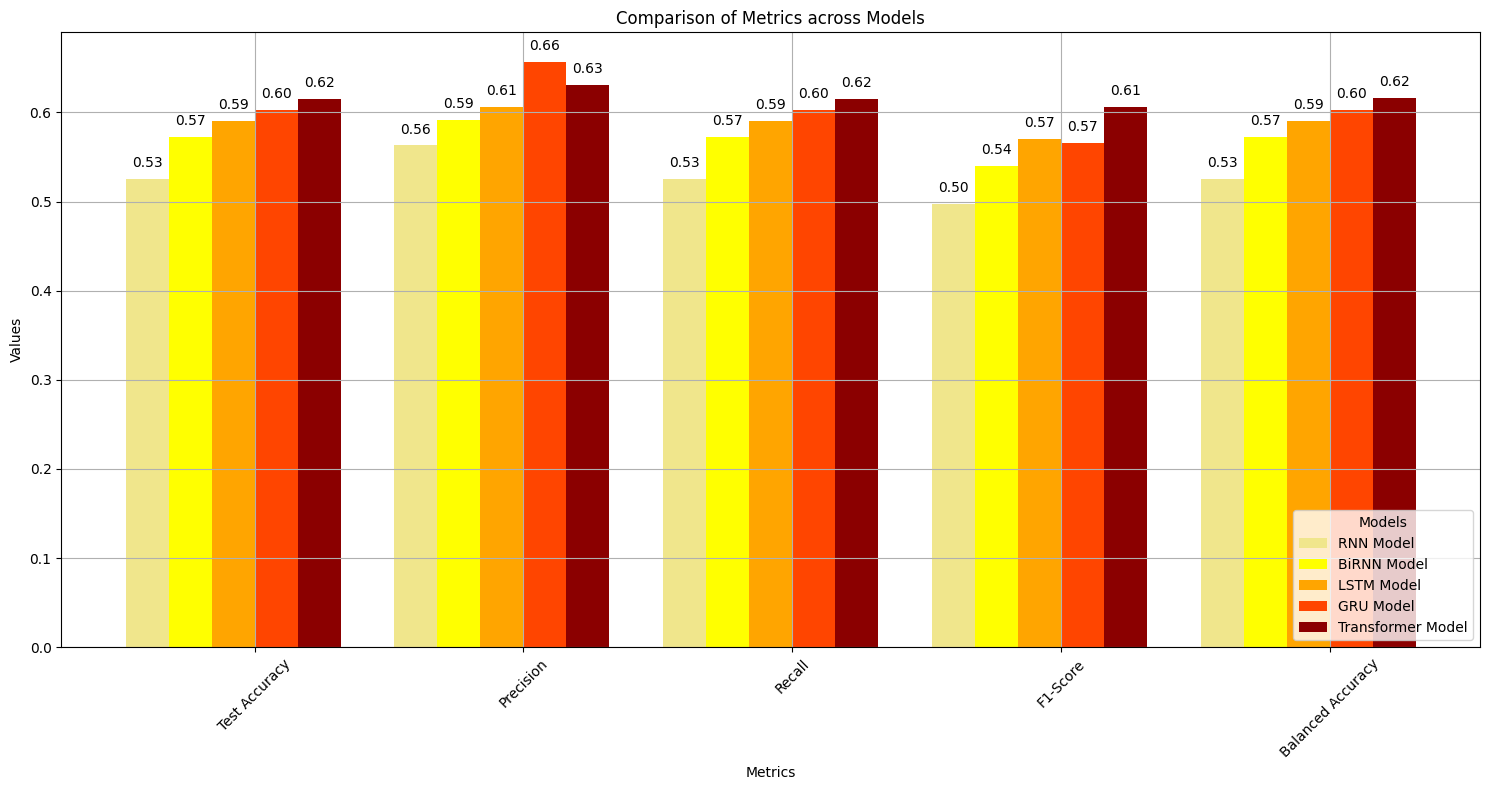

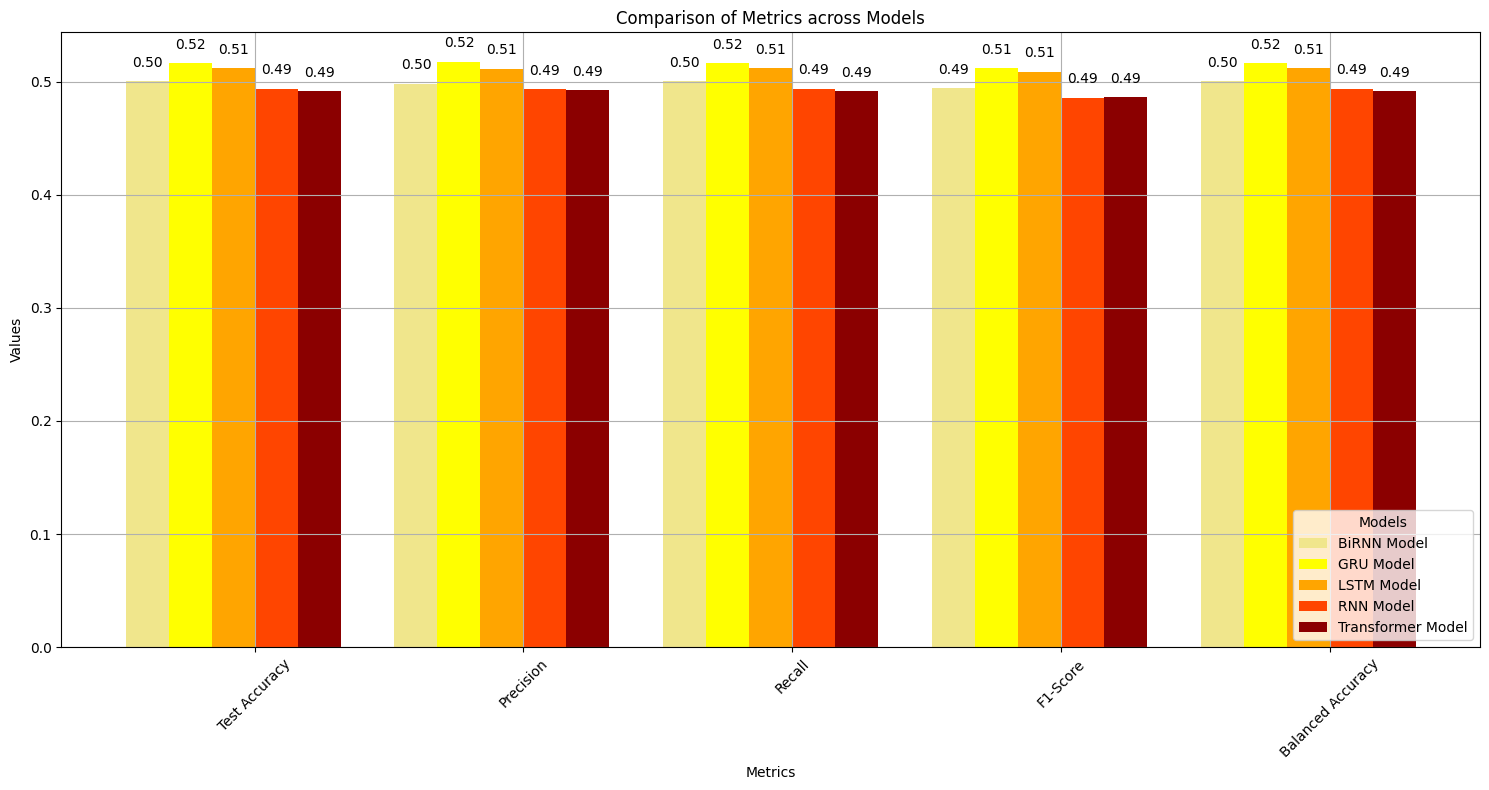

In [7]:
import pandas as pd

# Select the columns that are numeric and exclude 'Dataset' and 'Model'
numeric_cols = ['Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'Balanced Accuracy']

# Group by 'Model' and calculate the mean of the numeric columns
mean_df_in = df_in.groupby('Model')[numeric_cols].mean().reset_index()
mean_df_cross = df_cross.groupby('Model')[numeric_cols].mean().reset_index()

order = ["RNN Model", "BiRNN Model", "LSTM Model", "GRU Model", "Transformer Model"]

mean_df_in['Model'] = pd.Categorical(mean_df_in['Model'], categories=order, ordered=True)

# Sort the DataFrame by the 'Model' column
mean_df_in = mean_df_in.sort_values('Model').reset_index(drop=True)

# Display the result
print(mean_df_in)
print(mean_df_cross)

plot_comparison_single(mean_df_in)
plot_comparison_single(mean_df_cross)

In [8]:
mean_df_in['Model'] = mean_df_in['Model'].str.replace(' Model', '')
mean_df_cross['Model'] = mean_df_cross['Model'].str.replace(' Model', '')

In [9]:
display(mean_df_in.round(2))
display(mean_df_cross.round(2))

,Model,Test Accuracy,Precision,Recall,F1-Score,Balanced Accuracy
0,RNN,0.53,0.56,0.53,0.50,0.53
1,BiRNN,0.57,0.59,0.57,0.54,0.57
2,LSTM,0.59,0.61,0.59,0.57,0.59
3,GRU,0.60,0.66,0.60,0.57,0.60
4,Transformer,0.62,0.63,0.62,0.61,0.62


,Model,Test Accuracy,Precision,Recall,F1-Score,Balanced Accuracy
0,BiRNN,0.50,0.50,0.50,0.49,0.50
1,GRU,0.52,0.52,0.52,0.51,0.52
2,LSTM,0.51,0.51,0.51,0.51,0.51
3,RNN,0.49,0.49,0.49,0.49,0.49
4,Transformer,0.49,0.49,0.49,0.49,0.49
